In [1]:
# imports 

import pandas as pd

# Adds the parent directory to the path to find the construction_loan package
import sys
sys.path.append('..')
from construction_loan import budget

import matplotlib.pyplot as plt

%pdb on

# formatting 
pd.options.display.float_format = '{:,.0f}'.format

# Set the maximum number of columns displayed
pd.set_option('display.max_columns', None)

# Optionally, set the maximum number of rows displayed
pd.set_option('display.max_rows', None)



Automatic pdb calling has been turned ON


In [2]:
# prepare the dataframe
df = budget.set_project_budget_from_csv('/Users/benoitfesquet/Dev/construction_loan/data/jensco_budget.csv')
 
df

,cost_category,cost_type,supplier,amount,start_date,end_date
0,Acquisition costs,Site acquisition,NaN,7740000,2020-12-09,2020-12-09
1,Other acquisition costs,Stamp Duty inc VAT (on actual purchase),NaN,189500,2020-12-09,2020-12-09
2,Other acquisition costs,Jensco legal costs land & S106,NaN,23563,2020-12-09,2020-12-09
3,Other acquisition costs,Jensco legal costs funding (inc Oak North),NaN,39350,2020-12-09,2020-12-09
4,Other acquisition costs,Jensco legal costs - Kinetic funding,NaN,33150,2020-12-09,2020-12-09
5,Other acquisition costs,Jensco legal fees - construction,NaN,38400,2020-12-09,2020-12-09
6,Other acquisition costs,Bank Valuation Fees,NaN,16200,2020-12-09,2020-12-09
7,Other acquisition costs,Vat recovered on day 1 costs,NaN,-20941,2021-02-03,2021-02-03
8,Construction costs,Construction costs,NaN,29271426,2021-02-03,2022-09-30
9,Professional fees,Development Management Fee,NaN,338000,2022-09-30,2022-09-30


In [8]:
cashflow_df = budget.group_by_cost_category(budget.group_by_calendar_month(budget.spread_costs_evenly(df)))
cashflow_df["total"] = cashflow_df.sum(axis=1)
cashflow_df

cost_category,Acquisition costs,Construction costs,Marketing,Other acquisition costs,Other costs,Professional fees,Project contingency,Statutory costs,total
date,,,,,,,,,
2020-12,"7,740,000",0,0,"340,163","372,374","425,070",0,0,"8,877,607"
2021-01,0,0,0,0,0,0,0,0,0
2021-02,0,"1,257,946",0,"-20,941",0,"6,869",0,"16,760","1,260,634"
2021-03,0,"1,499,858",0,0,0,"21,489",0,"19,983","1,541,331"
2021-04,0,"1,451,476",0,0,0,"20,796",0,"19,339","1,491,610"
2021-05,0,"1,499,858","6,012",0,0,"21,489",0,"19,983","1,547,343"
2021-06,0,"1,451,476","15,030",0,0,"20,796",0,"19,339","1,506,640"
2021-07,0,"1,499,858","15,531",0,0,"21,530",0,"19,983","1,556,903"
2021-08,0,"1,499,858","15,531",0,0,"21,632",0,"19,983","1,557,004"


In [9]:
cashflow_df.columns

Index(['Acquisition costs', 'Construction costs', 'Marketing',
       'Other acquisition costs', 'Other costs', 'Professional fees',
       'Project contingency', 'Statutory costs', 'total'],
      dtype='object', name='cost_category')

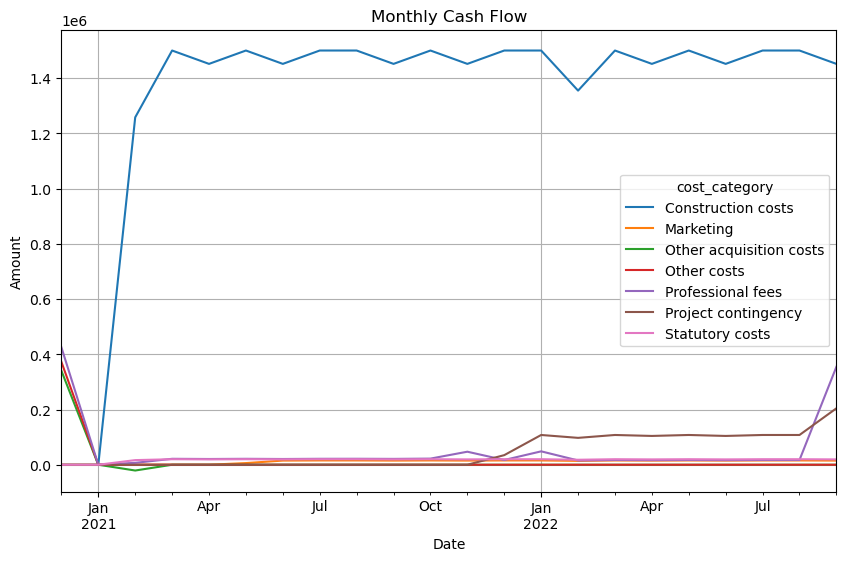

In [6]:
# Plotting
cashflow_df_excl_acq = cashflow_df.drop(['Acquisition costs', 'total'], axis=1)
cashflow_df_excl_acq.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Cash Flow')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()